### Topic Modeling the Whole Corpus

In [11]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from scipy.sparse import csr_matrix

def display_topics(file_path, num_top_words, feature_names):
    # Step 1: Load TF-IDF vectors
    tfidf_vectors = pd.read_csv(file_path)
    tfidf_matrix = csr_matrix(tfidf_vectors.values)

    num_topics = 12
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(tfidf_matrix)

    for topic_idx, topic in enumerate(lda_model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

# Example usage
file_path = 'vectorized_tfidf_300.csv'
num_top_words = 20
feature_names = pd.read_csv(file_path).columns
display_topics(file_path, num_top_words, feature_names)


Topic 0:
salle water desantis linkedin iowa llama austen sexually chandrasekaran supplier moines coffee breach recruitment suing volatility mullet ny shareholder ingested
Topic 1:
merchat repair cruise shop cent oracle painting blizzard glossary budget parameter discipline favour sentence technique printer output therefore analytics ergonomic
Topic 2:
amd ftc facstamp orth cpu fac peds solo traveling church advertiser walla facstamps athlete pentagon cincinnati trihealth gpus destination bashing
Topic 3:
reben gene ar mckinsey profluent classroom crispr edit teaching residence educator laguna wang thena saxena composer beach fontenot snap apis
Topic 4:
guardian journalism plastic button zoom keyboard perlmutter fulfilment pittsburgh mohapatra bubble fcc oral window kansler walk brainstorm pixel summarizes exam
Topic 5:
kapture metaverse secondary cx axios crore capillary mongodb cactus zimmermann doc saas alternative ravinutala vandehei ecommerce flashcard skilling rapper gmail
Topic 6

5. Assigning Categories to the Topics
- This step we have to do manually by named each topics based on its key words

In [2]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from scipy.sparse import csr_matrix

def display_topics_with_categories(model, feature_names, num_top_words, topic_categories):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d: %s" % (topic_idx, topic_categories.get(topic_idx, "Undefined")))
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print("Top Words:", ", ".join(top_words))
        print()

# Define categories for each topic
topic_categories = {
    0: "Technology and Innovation",
    1: "Politics and Security",
    2: "Legal and Regulatory Compliance",
    3: "Cruptocurrency and Blockchain Technology",
    4: "Communication and Collaboration Tools",
    5: "Financial Markets and Investment Strategies",
    6: "Corporate Ventures and Partnerships",
    7: "Healthcare and Medical Practices",
    8: "AI. and Technology Companies",
    9: "Corporate Governance and Compliance Issues",
    10: "Social Impact and Ethical Considerations",
    11: "Technology Research and Development",
   
}

# Example usage: Assuming you have already defined and fitted the LDA model
num_topics = 12  # Assuming you have 12 topics
feature_names = pd.read_csv('tfidf_vectorized_300.csv').columns
num_top_words = 30  # Assuming you want to display 30 top words per topic
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(csr_matrix(pd.read_csv('tfidf_vectorized_300.csv').values))
display_topics_with_categories(lda_model, feature_names, num_top_words, topic_categories)


Topic 0: Technology and Innovation
Top Words: adobe, rephrase, roose, desantis, hr, guidebook, capgemini, orth, accord, cognizant, contends, solo, kessler, steves, pmf, bos, gallagher, graph, headcount, andy, pizzi, austen, displace, traveling, fauci, johnny, farid, pga, destination, operator

Topic 1: Politics and Security
Top Words: cognizant, oracle, cent, kumar, per, pandora, drawing, blizzard, deserves, revolutionize, bargain, dean, abbott, ravi, peril, minor, inventor, clifford, godlike, sullivan, simultaneously, geek, ballot, container, hampshire, invent, delivered, warcraft, emerson, cognitive

Topic 2: Legal and Regulatory Compliance
Top Words: lensa, gallagher, employer, facstamp, dealer, oral, selfies, befake, fac, predicts, cheating, cc, booming, peer, horwitz, dealership, truck, church, loch, facstamps, walla, fantasy, infosys, chevrolet, chevy, crore, prisma, strong, zillow, ensign

Topic 3: Cruptocurrency and Blockchain Technology
Top Words: reben, getty, drake, adobe, a

6. Assigning Topics to Documents

In [3]:
# Obtain document-topic distribution matrix
document_topic_distribution = lda_model.transform(csr_matrix(pd.read_csv('tfidf_vectorized_300.csv').values))

document_topics = []
for i, document in enumerate(document_topic_distribution):
    dominant_topic = document.argmax()  # Identify dominant topic
    topic_label = topic_categories.get(dominant_topic, "Undefined")  # Assign topic label
    document_topics.append({"document_id": i, "topic": topic_label})
    
# Print document-topic assignment
for doc_topic in document_topics:
    print("Document ID:", doc_topic["document_id"], "- Topic:", doc_topic["topic"])


Document ID: 0 - Topic: Social Impact and Ethical Considerations
Document ID: 1 - Topic: Social Impact and Ethical Considerations
Document ID: 2 - Topic: Social Impact and Ethical Considerations
Document ID: 3 - Topic: Social Impact and Ethical Considerations
Document ID: 4 - Topic: Social Impact and Ethical Considerations
Document ID: 5 - Topic: Social Impact and Ethical Considerations
Document ID: 6 - Topic: Social Impact and Ethical Considerations
Document ID: 7 - Topic: Social Impact and Ethical Considerations
Document ID: 8 - Topic: Social Impact and Ethical Considerations
Document ID: 9 - Topic: Social Impact and Ethical Considerations
Document ID: 10 - Topic: Social Impact and Ethical Considerations
Document ID: 11 - Topic: Social Impact and Ethical Considerations
Document ID: 12 - Topic: Social Impact and Ethical Considerations
Document ID: 13 - Topic: Social Impact and Ethical Considerations
Document ID: 14 - Topic: Social Impact and Ethical Considerations
Document ID: 15 - To

7. Visualizing the LDA topics

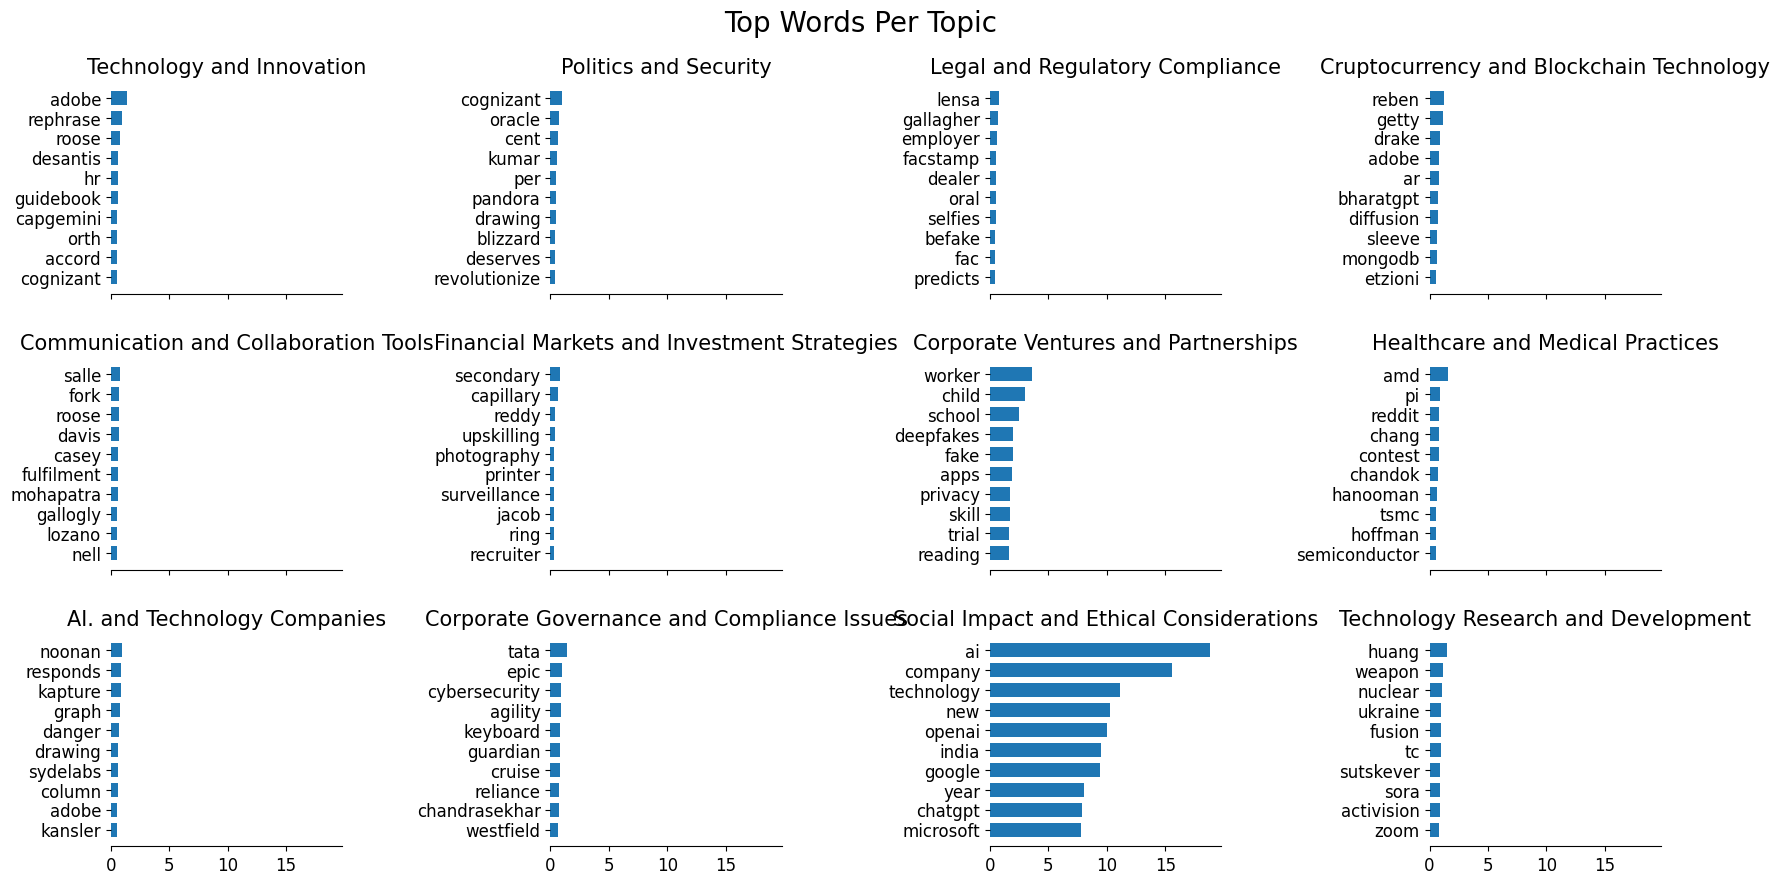

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np

# Define topic names
topic_names = [
    "Technology and Innovation",
    "Politics and Security",
    "Legal and Regulatory Compliance",
    "Cruptocurrency and Blockchain Technology",
    "Communication and Collaboration Tools",
    "Financial Markets and Investment Strategies",
    "Corporate Ventures and Partnerships",
    "Healthcare and Medical Practices",
    "AI. and Technology Companies",
    "Corporate Governance and Compliance Issues",
    "Social Impact and Ethical Considerations",
    "Technology Research and Development",
]

# Plot the top words for each topic
def plot_top_words(model, feature_names, n_top_words, title, topic_names=None):
    num_topics = len(model.components_)
    ncols = min(num_topics, 4)  # Maximum number of columns
    nrows = (num_topics // ncols) + (num_topics % ncols > 0)  # Calculate number of rows
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows), sharex=True)
    axes = axes.flatten()  # Flatten axes for easy iteration
    
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx >= num_topics:  # Check if topic index exceeds the number of topics
            break  # Exit loop if all topics have been plotted
        
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        if topic_names is not None:
            ax.set_title(topic_names[topic_idx], fontsize=15)
        else:
            ax.set_title(f'Topic {topic_idx}', fontsize=15)
        ax.barh(top_features, weights, height=0.7)
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

    # Hide any extra subplots
    for i in range(num_topics, len(axes)):
        axes[i].axis('off')
        
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Example usage: Assuming you have already defined and fitted the LDA model
num_topics = 12  # Assuming you have 15 topics
feature_names = pd.read_csv('tfidf_vectorized_300.csv').columns
num_top_words = 10  # Assuming you want to display 10 top words per topic
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(csr_matrix(pd.read_csv('tfidf_vectorized_300.csv').values))
plot_top_words(lda_model, feature_names, n_top_words=num_top_words, title='Top Words Per Topic', topic_names=topic_names)


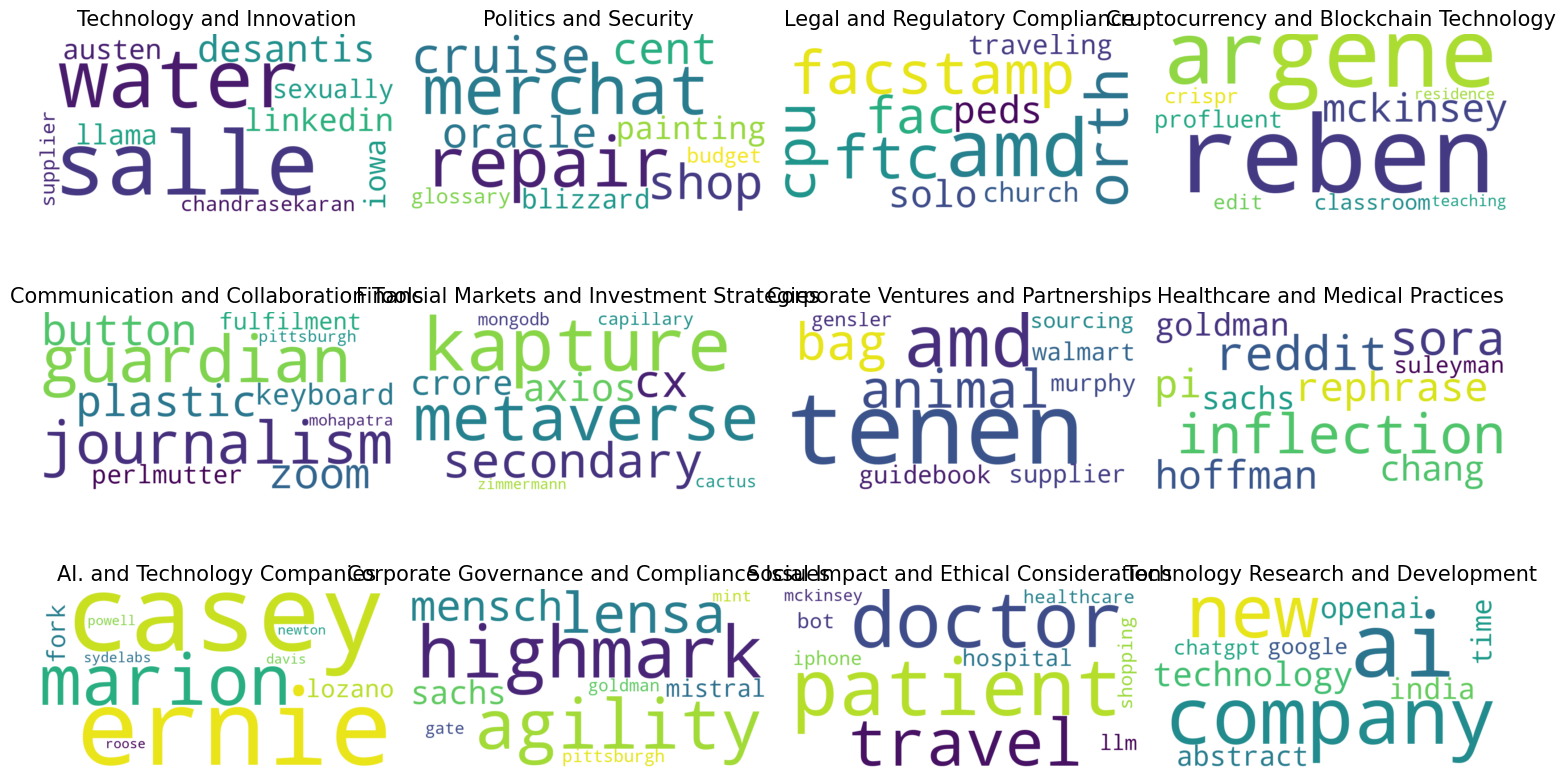

In [5]:
from wordcloud import WordCloud

# Create word clouds for each topic
def plot_word_clouds(model, feature_names, num_topics, n_top_words, topic_names=None):
    # Create subplots based on the number of topics
    ncols = min(num_topics, 4)  # Maximum number of columns
    nrows = (num_topics // ncols) + (num_topics % ncols > 0)  # Calculate number of rows
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten the axes for easy iteration
    
    # Generate a word cloud for each topic
    for topic_idx, topic in enumerate(model.components_):
        # Get the top words and their weights for the current topic
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = {feature_names[i]: topic[i] for i in top_features_ind}
        
        # Generate a word cloud for the current topic
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_features)
        
        # Plot the word cloud
        ax = axes[topic_idx]
        if topic_names is not None:
            ax.set_title(topic_names[topic_idx], fontsize=15)
        else:
            ax.set_title(f'Topic {topic_idx}', fontsize=15)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
    
    # Hide any extra subplots
    for i in range(num_topics, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage: Assuming you have already defined and fitted the LDA model
num_topics = 12  # Assuming you have 15 topics
feature_names = pd.read_csv('tfidf_vectorized_300.csv').columns
num_top_words = 10  # Assuming you want to display 20 top words per topic
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(csr_matrix(pd.read_csv('tfidf_vectorized_300.csv').values))
plot_word_clouds(lda_model, feature_names, num_topics=num_topics, n_top_words=num_top_words, topic_names=topic_names)


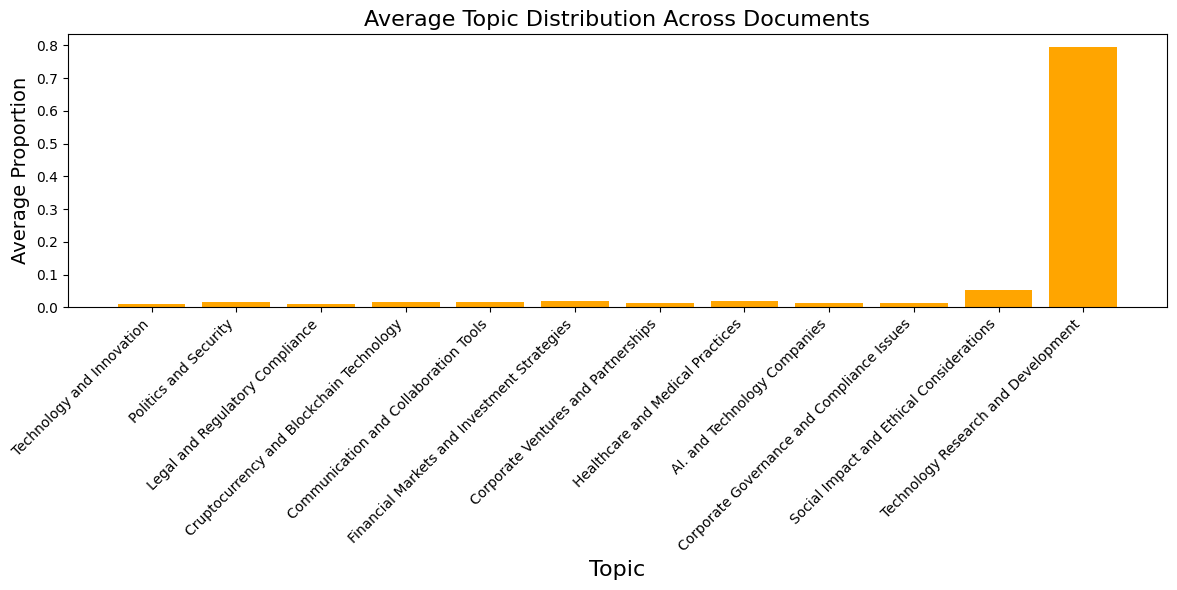

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Get topic distribution for each document
topic_distribution = lda_model.transform(csr_matrix(pd.read_csv('tfidf_vectorized_300.csv').values))

# Calculate the average topic distribution across all documents
average_topic_distribution = topic_distribution.mean(axis=0)

# Define topic names
topic_names = [
    "Technology and Innovation",
    "Politics and Security",
    "Legal and Regulatory Compliance",
    "Cruptocurrency and Blockchain Technology",
    "Communication and Collaboration Tools",
    "Financial Markets and Investment Strategies",
    "Corporate Ventures and Partnerships",
    "Healthcare and Medical Practices",
    "AI. and Technology Companies",
    "Corporate Governance and Compliance Issues",
    "Social Impact and Ethical Considerations",
    "Technology Research and Development",
]

# Plot the average topic distribution with topic names
plt.figure(figsize=(12, 6))
plt.bar(range(len(average_topic_distribution)), average_topic_distribution, color='orange')
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Average Proportion', fontsize=14)
plt.title('Average Topic Distribution Across Documents', fontsize=16)
plt.xticks(range(len(average_topic_distribution)), topic_names, rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [7]:
import pandas as pd

# Get feature names
feature_names = pd.read_csv('tfidf_vectorized_300.csv').columns

# Number of top words per topic to display
n_top_words = 20

# Extract the topics and their terms
topics = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    topics.append(f"Topic {topic_idx}")

# Create a dataframe to display the topics
df_topics = pd.DataFrame({
    'Topic': [f"Topic {i}" for i in range(num_topics)],
    'Terms per Topic': [" ".join([feature_names[i] for i in lda_model.components_[topic_idx].argsort()[:-n_top_words - 1:-1]]) for topic_idx in range(num_topics)]
})

# Display the dataframe
print(df_topics)


       Topic                                    Terms per Topic
0    Topic 0  salle water desantis linkedin iowa llama auste...
1    Topic 1  merchat repair cruise shop cent oracle paintin...
2    Topic 2  amd ftc facstamp orth cpu fac peds solo travel...
3    Topic 3  reben gene ar mckinsey profluent classroom cri...
4    Topic 4  guardian journalism plastic button zoom keyboa...
5    Topic 5  kapture metaverse secondary cx axios crore cap...
6    Topic 6  tenen amd animal bag guidebook walmart supplie...
7    Topic 7  inflection sora reddit rephrase pi hoffman cha...
8    Topic 8  casey ernie marion lozano fork sydelabs davis ...
9    Topic 9  highmark agility lensa mensch sachs mistral pi...
10  Topic 10  patient doctor travel hospital llm bot iphone ...
11  Topic 11  ai company new technology openai india abstrac...
